In [1]:
import pandas as pd
import numpy as np 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import nltk 
from itertools import chain
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Jordan\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Jordan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jordan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
pd.set_option('display.max_colwidth', None)
df = pd.read_csv(r'C:\Users\Jordan\Desktop\jupyter notebook\Adv ML\vaccination_all_tweets.csv', encoding = 'utf-8-sig')

In [3]:
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA","Aggregator of Asian American news; scanning diverse sources 24/7/365. RT's, Follows and 'Likes' will fuel me 👩‍💻",2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s music junkie. Fascinated by meteorology and all things in the cloud. Opinions are my own.",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,"While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm",NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P,"['coronavirus', 'SputnikV', 'AstraZeneca', 'PfizerBioNTech', 'Moderna', 'Covid_19']",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radio Network. Weeknights 7 Pacific-10 Eastern - Email comments/ideas to charles@charlesadlertonight.ca",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born i… https://t.co/jqgV18kch4",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternative news source from citizen journalists that haven't sold out. Real news & real views,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @BorisJohnson @MattHancock #whereareallthesickpeople #PfizerBioNTech… https://t.co/KxbSRoBEHq,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


# Basic Data Exploration

In [4]:
print(f"Data shape: {df.shape}")

Data shape: (46059, 16)


In [5]:
df.describe()

,id,user_followers,user_friends,user_favourites,retweets,favorites
count,4.605900e+04,4.605900e+04,46059.000000,4.605900e+04,46059.000000,46059.000000
mean,1.367028e+18,1.034974e+05,1334.568011,1.546242e+04,3.084196,13.521700
std,9.076528e+15,8.547810e+05,5998.529071,4.293305e+04,44.721765,191.984916
min,1.337728e+18,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,1.363363e+18,1.230000e+02,148.000000,3.790000e+02,0.000000,0.000000
50%,1.368340e+18,5.840000e+02,425.000000,2.225000e+03,0.000000,1.000000
75%,1.373482e+18,2.705500e+03,1222.000000,1.155550e+04,1.000000,4.000000
max,1.378952e+18,1.491979e+07,380428.000000,1.205878e+06,6683.000000,22815.000000


In [6]:
df.dtypes

id                   int64
user_name           object
user_location       object
user_description    object
user_created        object
user_followers       int64
user_friends         int64
user_favourites      int64
user_verified         bool
date                object
text                object
hashtags            object
source              object
retweets             int64
favorites            int64
is_retweet            bool
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46059 entries, 0 to 46058
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                46059 non-null  int64 
 1   user_name         46059 non-null  object
 2   user_location     35694 non-null  object
 3   user_description  42969 non-null  object
 4   user_created      46059 non-null  object
 5   user_followers    46059 non-null  int64 
 6   user_friends      46059 non-null  int64 
 7   user_favourites   46059 non-null  int64 
 8   user_verified     46059 non-null  bool  
 9   date              46059 non-null  object
 10  text              46059 non-null  object
 11  hashtags          36243 non-null  object
 12  source            46017 non-null  object
 13  retweets          46059 non-null  int64 
 14  favorites         46059 non-null  int64 
 15  is_retweet        46059 non-null  bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 5.0+ MB


In [8]:
df.isnull().sum()

id                      0
user_name               0
user_location       10365
user_description     3090
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
hashtags             9816
source                 42
retweets                0
favorites               0
is_retweet              0
dtype: int64

In [9]:
# Missing values

def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

missing_data(df)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
Total,0,0,10365,3090,0,0,0,0,0,0,0,9816,42,0,0,0
Percent,0.0,0.0,22.503745,6.708787,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.311796,0.091187,0.0,0.0,0.0
Types,int64,object,object,object,object,int64,int64,int64,bool,object,object,object,object,int64,int64,bool


In [10]:
# Unique values

def unique_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    uniques = []
    for col in data.columns:
        unique = data[col].nunique()
        uniques.append(unique)
    tt['Uniques'] = uniques
    return(np.transpose(tt))

unique_values(df)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
Total,46059,46059,35694,42969,46059,46059,46059,46059,46059,46059,46059,36243,46017,46059,46059,46059
Uniques,46059,25553,9345,24494,25871,9752,5199,16866,2,45622,46018,16835,171,239,503,1


In [11]:
# Most frequent values

def most_frequent_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    items = []
    vals = []
    for col in data.columns:
        itm = data[col].value_counts().index[0]
        val = data[col].value_counts().values[0]
        items.append(itm)
        vals.append(val)
    tt['Most frequent item'] = items
    tt['Frequence'] = vals
    tt['Percent from total'] = np.round(vals / total * 100, 3)
    return(np.transpose(tt))

most_frequent_values(df)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
Total,46059,46059,35694,42969,46059,46059,46059,46059,46059,46059,46059,36243,46017,46059,46059,46059
Most frequent item,1377661711302467587,Workout Solutions,India,"George Tsanis – Workout Solutions Health and Fitness Consultants since 1996 – One-on-one and online distance coaching – Toronto, Canada, World",2010-09-20 17:01:08,0,0,0,False,2021-03-02 23:02:10,@POTUS What about #Covaxin from #Ocugen ?! It seems like it's better than anything we have now! Is it coming to the US? Why or why not??,['Moderna'],Twitter Web App,0,0,False
Frequence,1,1026,1237,1026,1026,335,397,671,40999,4,5,2160,14538,30075,19255,46059
Percent from total,0.002,2.228,3.466,2.388,2.228,0.727,0.862,1.457,89.014,0.009,0.011,5.96,31.593,65.297,41.805,100.0


C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 55356 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 57101 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 27784 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 35799 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 20255 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 55356 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda\lib\site-packages\

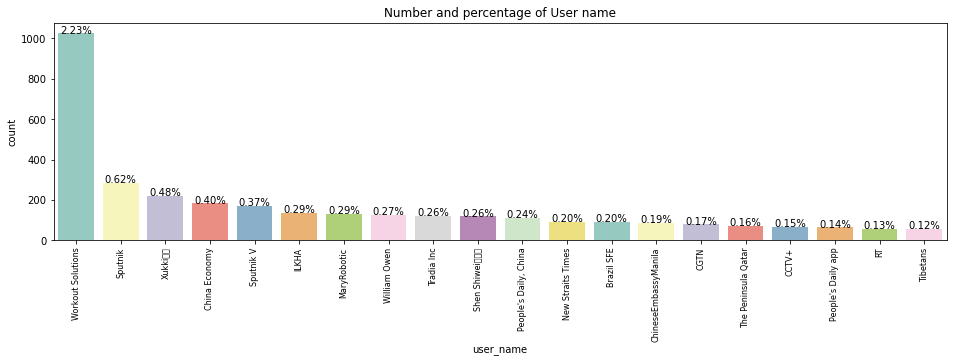

In [12]:
def plot_count(feature, title, df, size=1, ordered=True):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df))
    if ordered:
        g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette='Set3')
    else:
        g = sns.countplot(df[feature], palette='Set3')
    g.set_title("Number and percentage of {}".format(title))
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show()  
    
plot_count("user_name", "User name", df,4)

# Clean the 'text' column

In [13]:
stop = stopwords.words('english')           
stop.extend(['from', 'subject', 're', 'edu', 'use','like', 'im', 'know', 'just', 'dont', 'thats', 'right', 'people', 
             'youre', 'got', 'gonna', 'time', 'think', 'yeah', 'said',
             'say', '\s', 'mr', 'Mr', 'said', 'says', 'saying', 'today', 'be',
             'one','two', 'three', 'four', 'five','six','seven','eight','nine','ten', 'however',
             'i', 'ii', 'iii','iv','v', 'vii', 'viii', 'ix', 'x', 'xi', 'xii','xiii', 'xiv', 
             'often', 'called', 'new', 'date', 'fully', 'thus', 'new', 'include', 'http',
             'www','doi', 'preprint', 'copyright', 'peer', 'reviewed', 'org', 'https', 'et',
             'al', 'author', 'figure','rights', 'reserved', 'permission', 'used', 'using'])

df['text'] = df['text'].map(lambda x:  re.sub("@[A-Za-z0-9]+","",x)) # Remove the mentions
df['text'] = df['text'].apply(lambda x: re.split('https:\/\/.*', str(x))[0]) # Remove the links
df['text'] = df['text'].str.lower()# Turn them into lowercase
df['text'] = df['text'].map(lambda x: re.sub(r"[^\w+( +\w+)*$]", '', x)) # Remove special characters
df['text'] = df['text'].map(lambda x:  re.sub(r'\s{2,}', ' ', x)) # Remove the doubled spaces
df['text'] = df['text'].map(lambda x:  re.sub(r'@\w+', '', x)) # Remove Mentions
df['text'] = df['text'].map(lambda x:  re.sub(r'[^\x00-\x7F]+', ' ', x)) # Remove Unicode
df['text'] = df.text.str.replace("[^\w\s]", "",regex=True) # Remove punctuation
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)])) # Remove stopwords
df['text'] = df['text'].str.replace('\d+', '',regex=True) # Remove digits

# Most frequent words in tweets

In [14]:
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=50,
        max_font_size=40, 
        scale=5,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

In [15]:
def show_wordcloud(data, title=""):
    text = " ".join(t for t in data.dropna())
    stopwords = set(STOPWORDS)
    stopwords.update(["t", "co", "https", "amp", "U"])
    wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500,background_color="black").generate(text)
    fig = plt.figure(1, figsize=(16,16))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

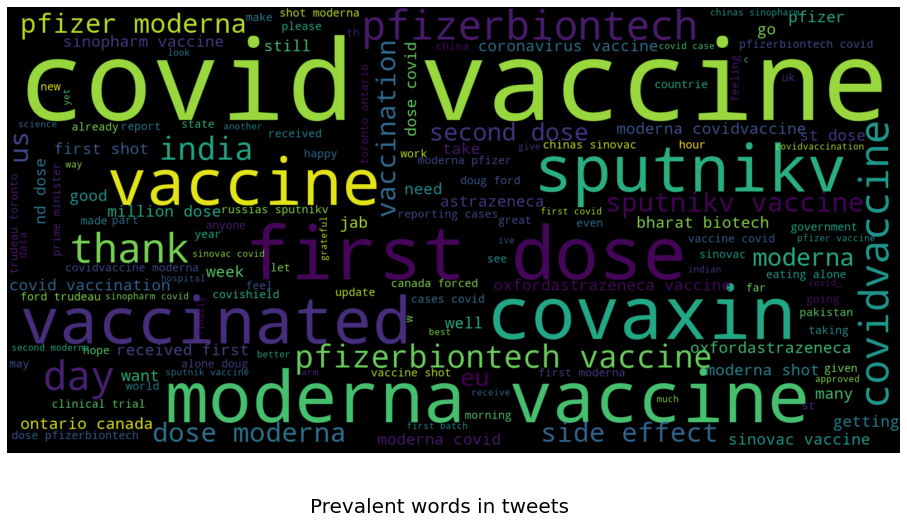

In [16]:
show_wordcloud(df['text'], title = 'Prevalent words in tweets')

# Sentiment Analysis

In [17]:
sia = SentimentIntensityAnalyzer()

def find_sentiment(post):
    if sia.polarity_scores(post)["compound"] > 0:
        return "Positive"
    elif sia.polarity_scores(post)["compound"] < 0:
        return "Negative"
    else:
        return "Neutral" 

In [18]:
def plot_sentiment(df, feature, title):
    counts = df[feature].value_counts()
    percent = counts/sum(counts)

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

    counts.plot(kind='bar', ax=ax1, color='green')
    percent.plot(kind='bar', ax=ax2, color='blue')
    ax1.set_ylabel(f'Counts : {title} sentiments', size=12)
    ax2.set_ylabel(f'Percentage : {title} sentiments', size=12)
    plt.suptitle(f"Sentiment analysis: {title}")
    plt.tight_layout()
    plt.show()

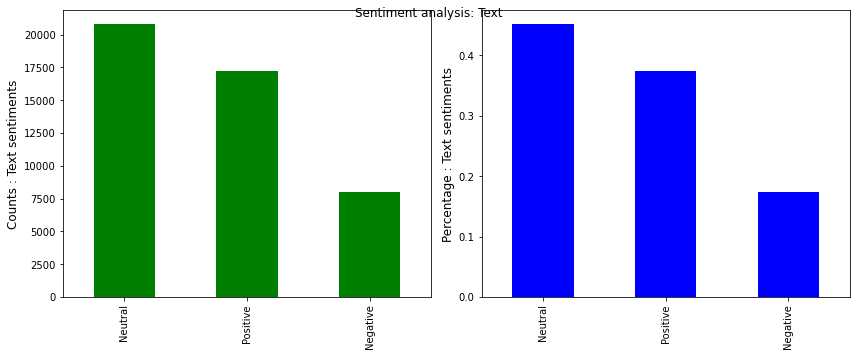

In [19]:
df['sentiment'] = df['text'].apply(lambda x: find_sentiment(x))
plot_sentiment(df, 'sentiment', 'Text')

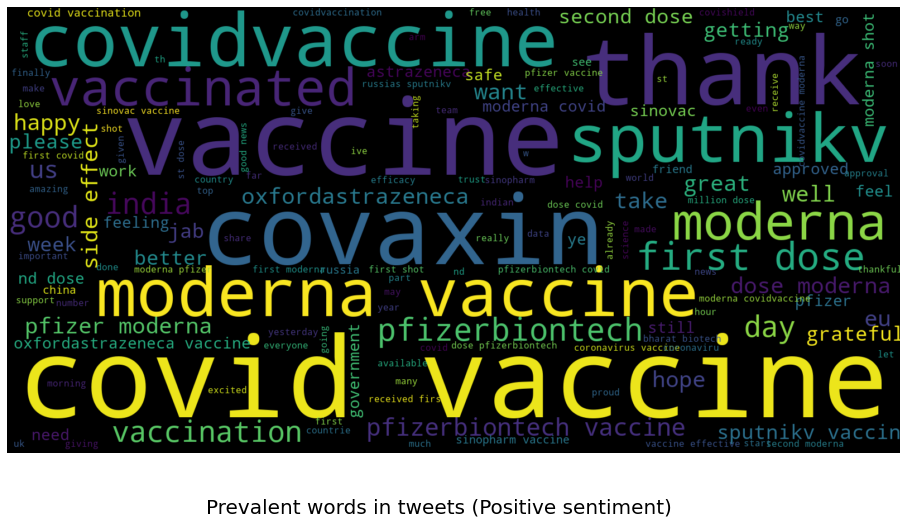

In [20]:
show_wordcloud(df.loc[df['sentiment']=='Positive', 'text'], title = 'Prevalent words in tweets (Positive sentiment)')

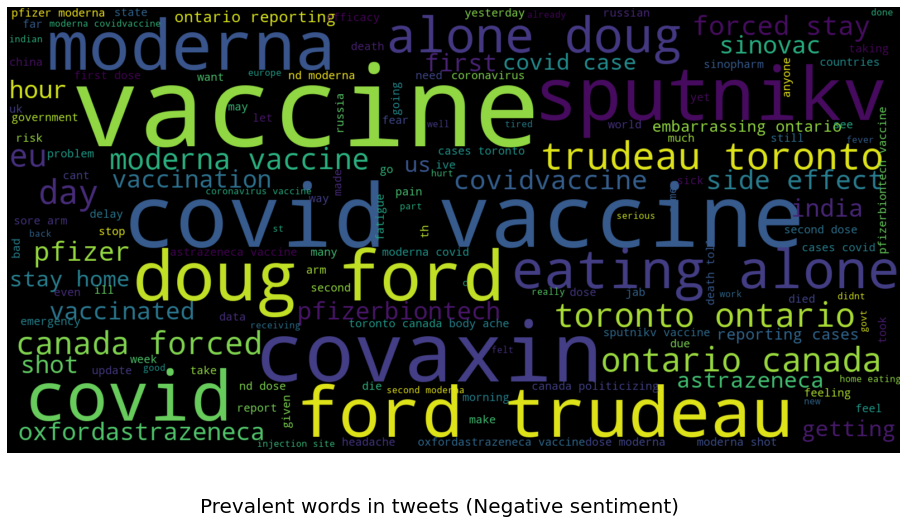

In [21]:
show_wordcloud(df.loc[df['sentiment']=='Negative', 'text'], title = 'Prevalent words in tweets (Negative sentiment)')

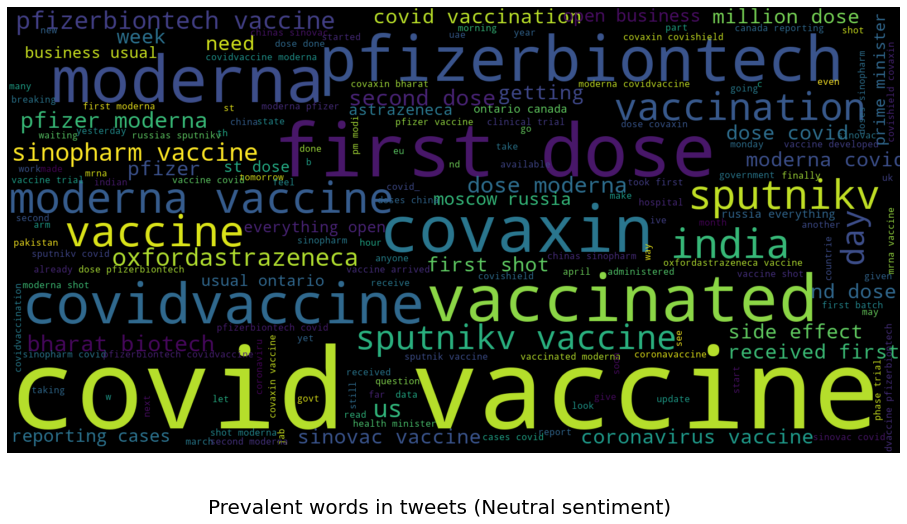

In [22]:
show_wordcloud(df.loc[df['sentiment']=='Neutral', 'text'], title = 'Prevalent words in tweets (Neutral sentiment)')

In [23]:
text = df['text']

In [24]:
text

0                                              folks daikon paste could treat cytokine storm pfizerbiontech
1                                world wrong side history year hopefully biggest vaccination effort weve ev
2        coronavirus sputnikv astrazeneca pfizerbiontech moderna covid_ russian vaccine created last  years
3                                    facts immutable senator even ethically sturdy enough acknowledge  born
4                                              explain need vaccine whereareallthesickpeople pfizerbiontech
                                                        ...                                                
46054                           russian covid vaccine sputnikv kenya th march  _kenya warned kenyans taking
46055                                 communique covid lockdown effects usiu university programmes semester
46056        mask worn face protection disguise performance entertainment ceremonial amp practical purposes
46057                       

# Keep only Nouns and Adjectives

In [25]:
from nltk import word_tokenize, pos_tag

# Let's create a function to pull out nouns from a string of text
def nouns_adj(text):
    '''Given a string of text, tokenize the text and pull out only the nouns and adjectives.'''
    is_noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2] == 'JJ'
    tokenized = word_tokenize(text)
    nouns_adj = [word for (word, pos) in pos_tag(tokenized) if is_noun_adj(pos)] 
    return ' '.join(nouns_adj)

In [26]:
# Apply the nouns function to the transcripts to filter only on nouns
nltk.download('averaged_perceptron_tagger')

text_nouns_adj = pd.DataFrame(text.apply(nouns_adj))
text_nouns_adj

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Jordan\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,text
0,folks paste cytokine storm pfizerbiontech
1,world wrong side history year biggest vaccination effort ev
2,coronavirus sputnikv astrazeneca pfizerbiontech moderna covid_ russian vaccine last years
3,facts immutable senator sturdy born
4,need vaccine whereareallthesickpeople pfizerbiontech
...,...
46054,russian covid vaccine sputnikv kenya march _kenya kenyans
46055,communique covid lockdown effects usiu university programmes
46056,mask face protection disguise performance entertainment ceremonial amp practical purposes
46057,nitrilegloves facemasks vaccines syringes contact sales


# Saving the clean 'text' column

In [27]:
np.savetxt("clean_text.csv", 
           text_nouns_adj,
           delimiter =", ",
           header='text',
           comments='',
           fmt ='% s')